In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import IPython
from IPython.display import display
import ipywidgets as widgets
%matplotlib widget

from seq_dse.visualization import data_frame_to_mesh_grid

In [3]:
import os, sys
ipynb_path = os.path.dirname(os.path.realpath("__file__"))
print(ipynb_path)

E:\Projects\SequenceDSE\scripts\sequence_dse\notebooks


In [4]:
def np_replace_value(data, threshold, target):
    target_ids = np.where(data > threshold)
    data[target_ids] = target
    return data

In [5]:
def pd_replace_value(data, column_name, threshold, target):
    target_ids = data.index[data[column_name] > threshold]
    data.loc[target_ids, column_name] = target
    return data

In [6]:
def column_data_to_mesh_grid(dxy, dz, nx, ny):
    # only works for the default DSE sampler grid
    mx = np.zeros((ny,nx))
    my = np.zeros((ny,nx))
    mz = np.zeros((ny,nx))
    for i in range(nx):
        for j in range(ny):
            mx[j,i] = dxy[i*nx + j, 0]
            my[j,i] = dxy[i*nx + j, 1]
            mz[j,i] = dz[i*nx + j]
    return mx, my, mz

In [7]:
def find_minimum(params, objs):
    minimum = np.min(objs)
    min_inds = np.where(np.abs(objs - minimum) < 1e-4)
    print(minimum)
    print(f'{min_inds} : {params[min_inds]}')

In [8]:
def mkdir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [13]:
model_name = '7_bar_truss'
# test_name = "displacement-tol=50.00_timeout=3.0_optimize=True"
test_name = "stress-tol=1.50_timeout=5.0_optimize=True_runtime-tol=5.0s"

In [14]:
model_data_path = os.path.join(ipynb_path, '..', 'gh_scripts', model_name)
image_data_path = os.path.join(model_data_path, 'dse_samples', test_name)

lower_csv_file_name = os.path.join(image_data_path, 'samples_lower.csv')
pd_data = pd.read_csv(lower_csv_file_name, header=None)
np_data = pd_data.to_numpy()
GH_param_vars_0 = np_data[:,:2]
objectives_0 = np_data[:,2]
objectives_0 = replace_value(objectives_0, 10, 3.0)

upper_csv_file_name = os.path.join(image_data_path, 'samples_upper.csv')
pd_data = pd.read_csv(upper_csv_file_name, header=None)
np_data = pd_data.to_numpy()
GH_param_vars_1 = np_data[:,:2]
objectives_1 = np_data[:,2]
objectives_1 = replace_value(objectives_1, 10, 3.0)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Projects\\SequenceDSE\\scripts\\sequence_dse\\notebooks\\..\\gh_scripts\\7_bar_truss\\dse_samples\\stress-tol=1.50_timeout=5.0_optimize=True_runtime-tol=5.0s\\samples_lower.csv'

In [ ]:
find_minimum(GH_param_vars_0, objectives_0)
find_minimum(GH_param_vars_1, objectives_1)

In [88]:
nx, ny = 20, 20
mesh_grid_0 = column_data_to_mesh_grid(GH_param_vars_0, objectives_0, nx, ny)
mesh_grid_1 = column_data_to_mesh_grid(GH_param_vars_1, objectives_1, nx, ny)

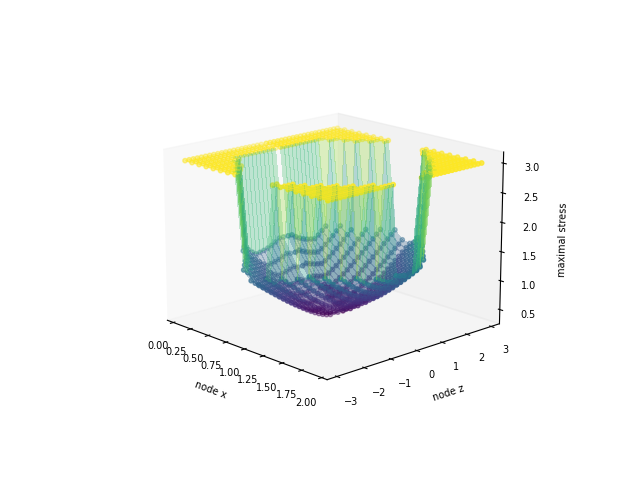

In [89]:
from matplotlib import cm

azim = -43.136143517498226
elev = 16.198550931109764

plt.clf()
plt.rc('font', size=7)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.view_init(elev, azim)

ax.scatter(GH_param_vars_0[:,0], GH_param_vars_0[:,1], objectives_0, c=objectives_0, s=10)
ax.plot_surface(*mesh_grid_0, cmap=cm.viridis, alpha=0.3,
                       linewidth=0, antialiased=False)

ax.scatter(GH_param_vars_1[:,0], GH_param_vars_1[:,1], objectives_1, c=objectives_1, s=10)
ax.plot_surface(*mesh_grid_1, cmap=cm.viridis, alpha=0.3,
                       linewidth=0, antialiased=False)

ax.set_xlabel('node x')
ax.set_ylabel('node z')
ax.set_zlabel('maximal stress')
ax.grid(False)
# plt.colorbar(sp)

fig.savefig(os.path.join(image_data_path, 'landscape'), dpi=200)

In [68]:
print('azim = {}'.format(ax.azim))
print('elev = {}'.format(ax.elev))

azim = -43.136143517498226
elev = 16.198550931109764


In [99]:
model_name = 'delauney_mesh_bridge'

# test_name = 'displacement-tol=10.00_timeout=1200.0_optimize=True_runtime-tol=1200.0s_num-scale=5_lower-chord-raise=1'
test_name = "displacement-tol=10.00_timeout=1200.0s_optimize=True_num-scale=5_lower-chord-raise=1support_line"
# test_name = 'stress-tol=10.00_timeout=1200.0_optimize=True_runtime-tol=1200.0s_num-scale=5_lower-chord-raise=1'
# test_name = 'stress-tol=10.00_timeout=1200.0s_optimize=True_num-scale=5_lower-chord-raise=1support_line'

In [100]:
model_data_path = os.path.join(ipynb_path, '..', 'gh_scripts', model_name)
image_data_path = os.path.join(model_data_path, 'dse_samples', test_name)
image_save_path = os.path.join(image_data_path, 'raw_imgs')
mkdir(image_save_path)

lower_csv_file_name = os.path.join(image_data_path, 'samples.csv')
orig_pd_data = pd.read_csv(lower_csv_file_name, header=None)
orig_pd_data.columns = ['var1', 'var2', 'var3', 'obj', 'num_elem', 'weight', 'karamba_model_path', 'seq_data_path']

pd_data = orig_pd_data.copy()

In [101]:
import json

num_solutions = []
for index, row in pd_data.iterrows():
    json_filepath = os.path.join(image_data_path, row['seq_data_path'])
    try:
        with open(json_filepath, 'r') as fp:
            seq_data = json.load(fp)
        num_solutions.append(len(seq_data['solutions']))
    except FileNotFoundError:
        num_solutions.append(0)
    
pd_data['num_sols'] = num_solutions

In [102]:
pd_data = pd_data.drop(columns=['karamba_model_path', 'seq_data_path'])

In [103]:
# var3_values = [0.1, 0.3, 0.5, 0.7, 0.9]
var3_values = sorted(np.unique(pd_data['var3']))
var3_values

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [104]:
pd_data.columns[3:]

Index(['obj', 'num_elem', 'weight', 'num_sols'], dtype='object')

In [105]:
constraint_type = test_name.split('_')[0].split('=')[0].split('-')[0]
# objective parsed from the CSV is already scaled
scale = 1.0

In [106]:
pd_data.sort_values(by=['obj'])[:15]

,var1,var2,var3,obj,num_elem,weight,num_sols
36,0.0,0.0,0.2,0.619301,69,691.385137,161
1,0.2,0.0,0.0,0.693918,71,737.031836,102
6,0.0,0.2,0.0,0.732174,73,798.527776,87
0,0.0,0.0,0.0,0.732682,49,780.351315,82
42,0.0,0.2,0.2,0.734876,89,711.411284,103
179,1.0,1.0,0.8,1.355717,286,584.637707,11
107,1.0,1.0,0.4,1.409622,282,565.396500,12
143,1.0,1.0,0.6,1.493194,286,552.964685,12
71,1.0,1.0,0.2,1.524374,260,562.073503,14
215,1.0,1.0,1.0,1.533121,303,571.294361,10


In [107]:
pd_data.sort_values(by=['obj'])[-10:]

,var1,var2,var3,obj,num_elem,weight,num_sols
79,0.2,0.2,0.4,6.483539,132,677.295214,45
99,0.6,0.8,0.4,6.558113,230,594.593505,16
7,0.2,0.2,0.0,6.669943,97,737.305952,77
201,0.6,0.6,1.0,6.713688,238,605.585391,15
109,0.2,0.0,0.6,7.384462,136,655.174190,43
115,0.2,0.2,0.6,7.457477,146,626.969355,40
151,0.2,0.2,0.8,7.983808,156,658.225515,32
43,0.2,0.2,0.2,8.093292,115,689.587917,57
145,0.2,0.0,0.8,8.532963,146,685.638767,37
181,0.2,0.0,1.0,9.411363,158,682.614314,32


In [77]:
obj_values = sorted(pd_data['obj'])
print(np.min(obj_values))
print(np.max(obj_values))

3.79596616885094
9.66269971835932


In [78]:
# TODO record row index values
infeasible_val = 15
np_data_from_var3 = []
for v in var3_values:
    var3_val_rows = pd_data[abs(pd_data['var3'] - v)<1e-6].to_numpy()
    np_replace_value(var3_val_rows[:,3], 800, infeasible_val)
    np_data_from_var3.append(var3_val_rows)

## wide format

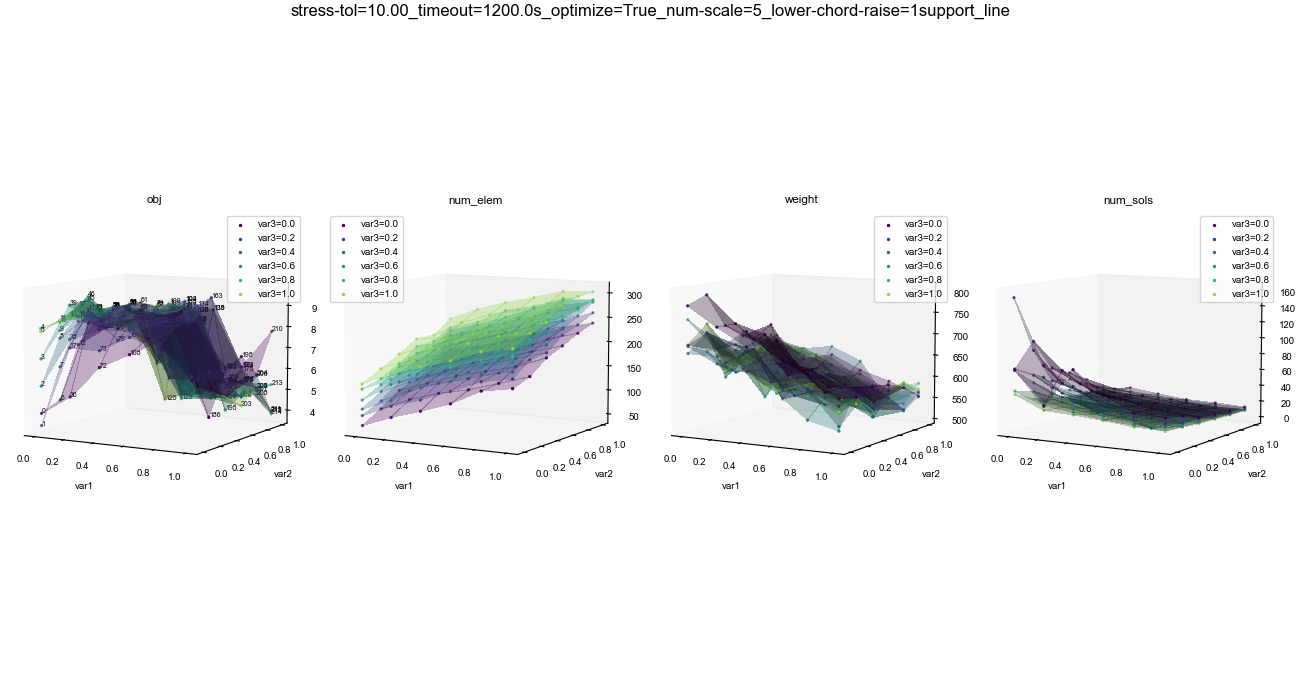

In [79]:
from matplotlib import cm

azim = -60.046697751995794
elev = 7.679260758531882

# plt.clf()
plt.rc('font', size=7)

fig = plt.figure(figsize=(13, 7), layout='constrained')

cmap = cm.get_cmap('viridis')
nx, ny = len(var3_values), len(var3_values)

obj_names = pd_data.columns[3:]
for k, obj_name in enumerate(obj_names):
    ax = fig.add_subplot(1, len(obj_names), k+1, projection='3d')
    # ax = plt.axes(projection ='3d')
    ax.view_init(elev, azim)
    
    # ax.scatter(pd_data['var1'], pd_data['var2'], pd_data[obj_name])
    if k == 0:
        for index, row in pd_data.iterrows():
            ax.text(row['var1'], row['var2'], row[obj_name], index, fontsize=5)

    for i in range(len(var3_values)):
        color = cmap(i/len(var3_values))
        sp = ax.scatter(np_data_from_var3[i][:,0], np_data_from_var3[i][:,1], np_data_from_var3[i][:,k+3], color=color, s=2, label=f"var3={var3_values[i]}")
        mesh_grid = column_data_to_mesh_grid(np_data_from_var3[i][:,:2], np_data_from_var3[i][:,k+3], nx, ny)
        ax.plot_surface(*mesh_grid, color=color, alpha=0.3,
                        linewidth=0, antialiased=False)

    # plt.colorbar(sp, ax=ax)
    ax.set_xlabel('var1')
    ax.set_ylabel('var2')
    ax.set_zlabel(obj_name)
    ax.title.set_text(obj_name)
    ax.grid(False)
    ax.legend()
fig.suptitle(test_name, fontsize=12)

fig.savefig(os.path.join(image_save_path, 'multi_obj_landscape.png'), dpi=200)
fig.savefig(os.path.join(image_save_path, 'multi_obj_landscape.pdf'), dpi=200)

## individual plots

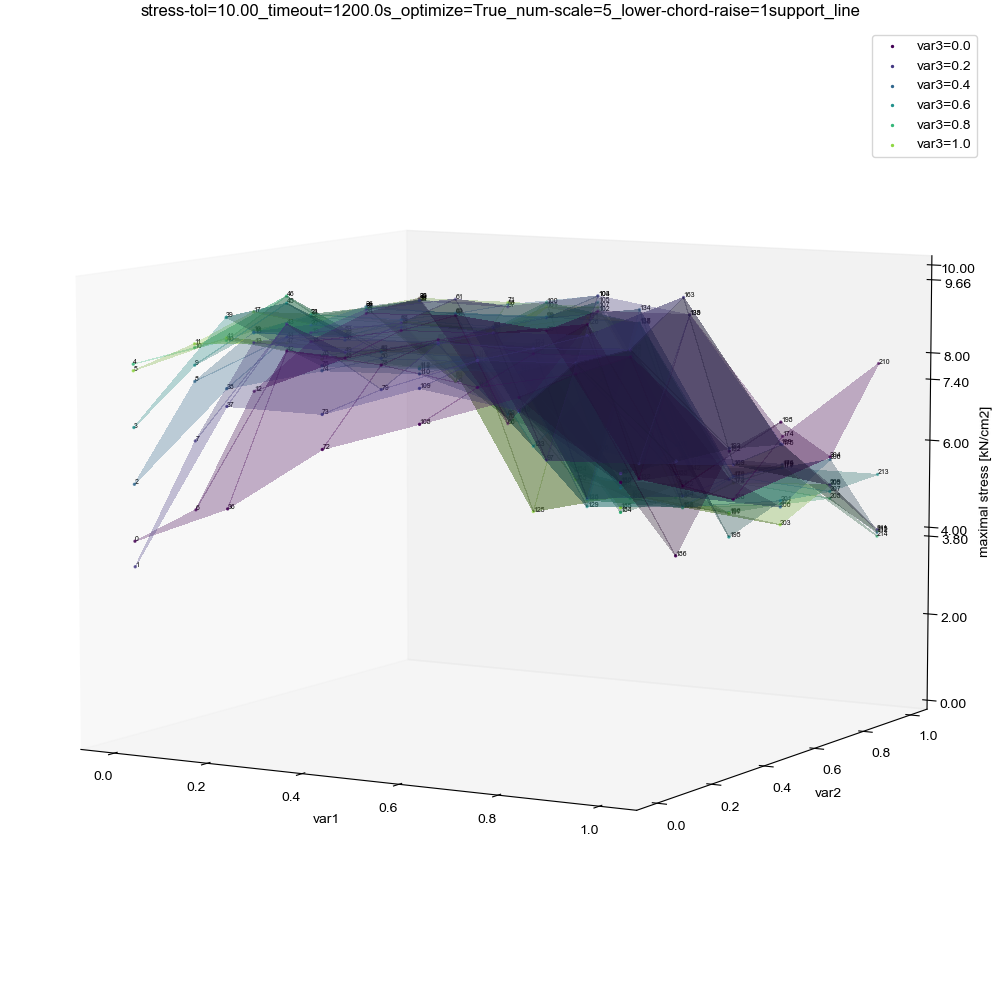

In [81]:
from matplotlib import cm

azim = -60.046697751995794
elev = 7.679260758531882

plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rc('font', size=10)
indexed = 1
write = 1

cmap = cm.get_cmap('viridis')
nx, ny = len(var3_values), len(var3_values)

if indexed:
    obj_names = ['obj']
else:
    obj_names = pd_data.columns[3:]

for k, obj_name in enumerate(obj_names):
    fig = plt.figure(figsize=(10, 10), layout='constrained')
    # ax = fig.add_subplot(1, len(obj_names), k+1, projection='3d')
    ax = plt.axes(projection ='3d')
    ax.view_init(elev, azim)
    
    # ax.scatter(pd_data['var1'], pd_data['var2'], pd_data[obj_name])
    if indexed:
        for index, row in pd_data.iterrows():
            ax.text(row['var1'], row['var2'], row[obj_name]*scale, index, fontsize=5)
        
    for i in range(len(var3_values)):
        color = cmap(i/len(var3_values))
        sp = ax.scatter(np_data_from_var3[i][:,0], np_data_from_var3[i][:,1], scale * np_data_from_var3[i][:,k+3], color=color, s=2, label=f"var3={var3_values[i]}")
        mesh_grid = column_data_to_mesh_grid(np_data_from_var3[i][:,:2], scale * np_data_from_var3[i][:,k+3], nx, ny)
        ax.plot_surface(*mesh_grid, color=color, alpha=0.3,
                        linewidth=0, antialiased=False)
        
    ax.set_zlim(bottom=0)
    
    z_min = np.min(pd_data[obj_name]) * scale
    z_max = np.max(pd_data[obj_name]) * scale
    z_mean = np.mean(pd_data[obj_name]) * scale
    extraticks = [z_min, z_mean, z_max]
    
    ax.set_zticks(list(ax.get_zticks()) + extraticks)

    # plt.colorbar(sp, ax=ax)
    ax.set_xlabel('var1')
    ax.set_ylabel('var2')
    
    if obj_name == 'obj':
        unit = '[kN/cm2]' if constraint_type == 'stress' else '[cm]'
        zlabel = 'maximal {} {}'.format(constraint_type, unit)
    else:
        zlabel = obj_name
    ax.set_zlabel(zlabel)
    
    # ax.title.set_text(obj_name)
    ax.grid(False)
    ax.legend()
    
    fig.suptitle(test_name, fontsize=12)
    index_prefix = '' if indexed else 'un'
    
    if write:
        fig.savefig(os.path.join(image_save_path, '{}_landscape_{}indexed.png'.format(obj_name, index_prefix)), dpi=200)
        if not indexed:
            fig.savefig(os.path.join(image_save_path, '{}_landscape_{}indexed.pdf'.format(obj_name, index_prefix)), dpi=200)

# Y-shaped Bridge (fixed topology)

In [9]:
model_name = 'Y_shaped_bridge'
test_name = 'min_stress_st_stress-tol=15.0000_timeout=60.0_opt-alg=iterative_feasible_search_CM_graph_distance'

In [10]:
model_data_path = os.path.join(ipynb_path, '..', '..', 'gh_scripts', model_name)
image_data_path = os.path.join(model_data_path, 'dse_samples', test_name)
image_save_path = os.path.join(image_data_path, 'raw_imgs')
mkdir(image_save_path)

lower_csv_file_name = os.path.join(image_data_path, 'samples.csv')
orig_pd_data = pd.read_csv(lower_csv_file_name, header=None)
orig_pd_data.columns = ['var1', 'var2', 'var3', 'var4', 'obj', 'weight', 'num_elems', 'seq_data_path', 
                        'misc_info']
num_vars = 4
pd_data = orig_pd_data.copy()

In [11]:
print(pd_data.columns)
print(pd_data.shape)

Index(['var1', 'var2', 'var3', 'var4', 'obj', 'weight', 'num_elems',
       'seq_data_path', 'misc_info'],
      dtype='object')
(16, 9)


In [12]:
pd_data = pd_data.drop(columns=['seq_data_path', 'misc_info', 'num_elems']) #, axis=1)
print(pd_data.shape)

(16, 6)


In [13]:
pd_data.columns[4:]

Index(['obj', 'weight'], dtype='object')

## quick variable sensitivity analysis

<AxesSubplot:xlabel='var1', ylabel='obj'>

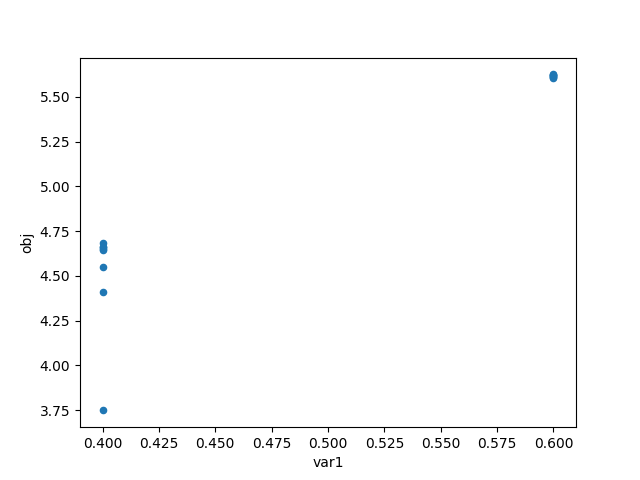

In [23]:
# pd_data[pd_data['obj']<80].plot.scatter(x='obj',y='num_sols')
pd_data.plot.scatter(x='var1',y='obj')
# pd_data.plot.scatter(x='var1',y='weight')

<AxesSubplot:xlabel='var2', ylabel='obj'>

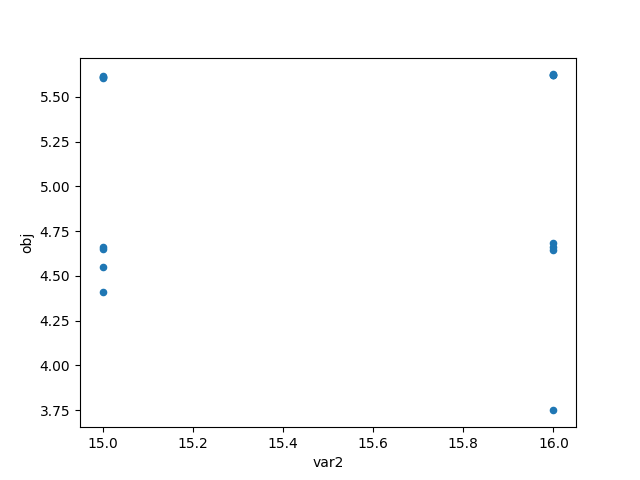

In [24]:
pd_data.plot.scatter(x='var2',y='obj')
# pd_data.plot.scatter(x='var2',y='weight')

<AxesSubplot:xlabel='var3', ylabel='obj'>

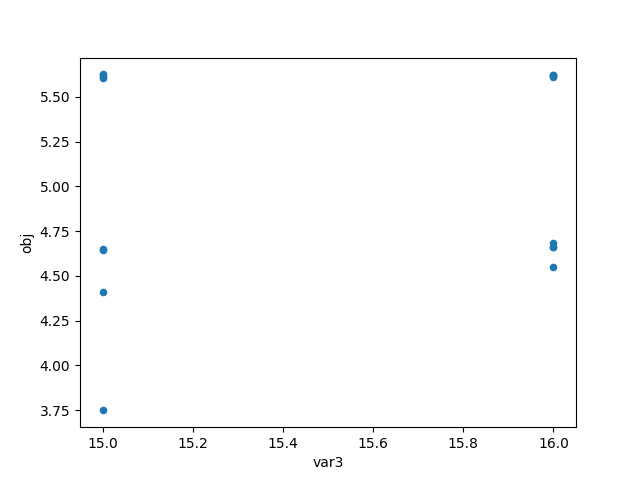

In [25]:
pd_data.plot.scatter(x='var3',y='obj')
# pd_data.plot.scatter(x='var3',y='weight')

<AxesSubplot:xlabel='var4', ylabel='obj'>

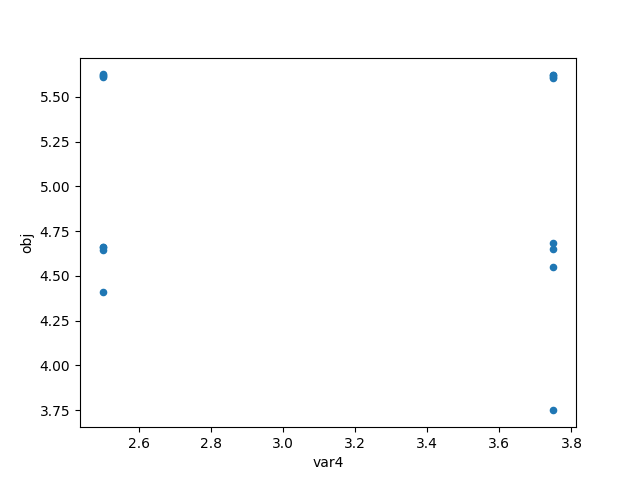

In [26]:
pd_data.plot.scatter(x='var4',y='obj')
# pd_data.plot.scatter(x='var4', y='weight')

<AxesSubplot:xlabel='obj', ylabel='weight'>

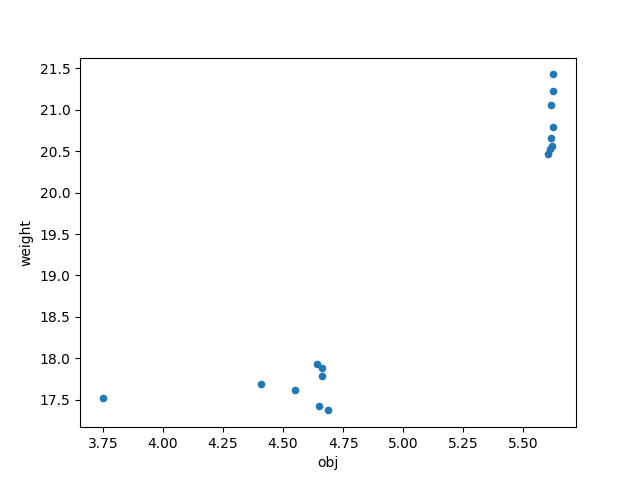

In [27]:
pd_data[pd_data['obj']<40].plot.scatter(x='obj',y='weight')

In [28]:
pd_data.sort_values(by=['obj'])[:15]

,var1,var2,var3,var4,obj,weight
5,0.4,16,15,3.75,3.749021,17.516063
0,0.4,15,15,2.50,4.407681,17.690160
3,0.4,15,16,3.75,4.551329,17.623633
4,0.4,16,15,2.50,4.642520,17.926082
1,0.4,15,15,3.75,4.649619,17.422969
2,0.4,15,16,2.50,4.660594,17.792118
6,0.4,16,16,2.50,4.661351,17.882654
7,0.4,16,16,3.75,4.685666,17.371773
9,0.6,15,15,3.75,5.603084,20.471621
11,0.6,15,16,3.75,5.608344,20.522770


In [29]:
# pd_data.sort_values(by=['obj'])[-10:]

## dev

In [34]:
objective_type = test_name.split('_')[1] #.split('=')[0].split('-')[0]
constraint_type = test_name.split('_')[3].split('-')[0]
print(objective_type)
print(constraint_type)

stress
stress


In [14]:
buffer = 1
z_value_limits_from_obj_name = {}
for obj_name in pd_data.columns[num_vars:]:
    obj_values = sorted(pd_data[obj_name])
    obj_lower_lim = np.min(obj_values)-buffer
    obj_upper_lim = np.max(obj_values)+buffer
    z_value_limits_from_obj_name[obj_name] = [obj_lower_lim, obj_upper_lim]
    print('{} min: {} | max: {}'.format(obj_name, np.min(obj_values), np.max(obj_values)))

obj min: 3.74902119494504 | max: 5.62474422417074
weight min: 17.3717727771454 | max: 21.4269833182899


TODO:

- sequence transfer
- local neighborhood
- partial ordering

## Aggregated plot

In [ ]:
pd_data.columns[num_vars:]

Index(['obj', 'weight'], dtype='object')

- v1 = branching point crv parm
- v2 = +x dist
- v3 = -x dist
- v4 = fork pt raise

In [22]:
plt.clf();

In [23]:
z_value_limits_from_obj_name

{'obj': [2.74902119494504, 6.62474422417074],
 'weight': [16.3717727771454, 22.4269833182899]}

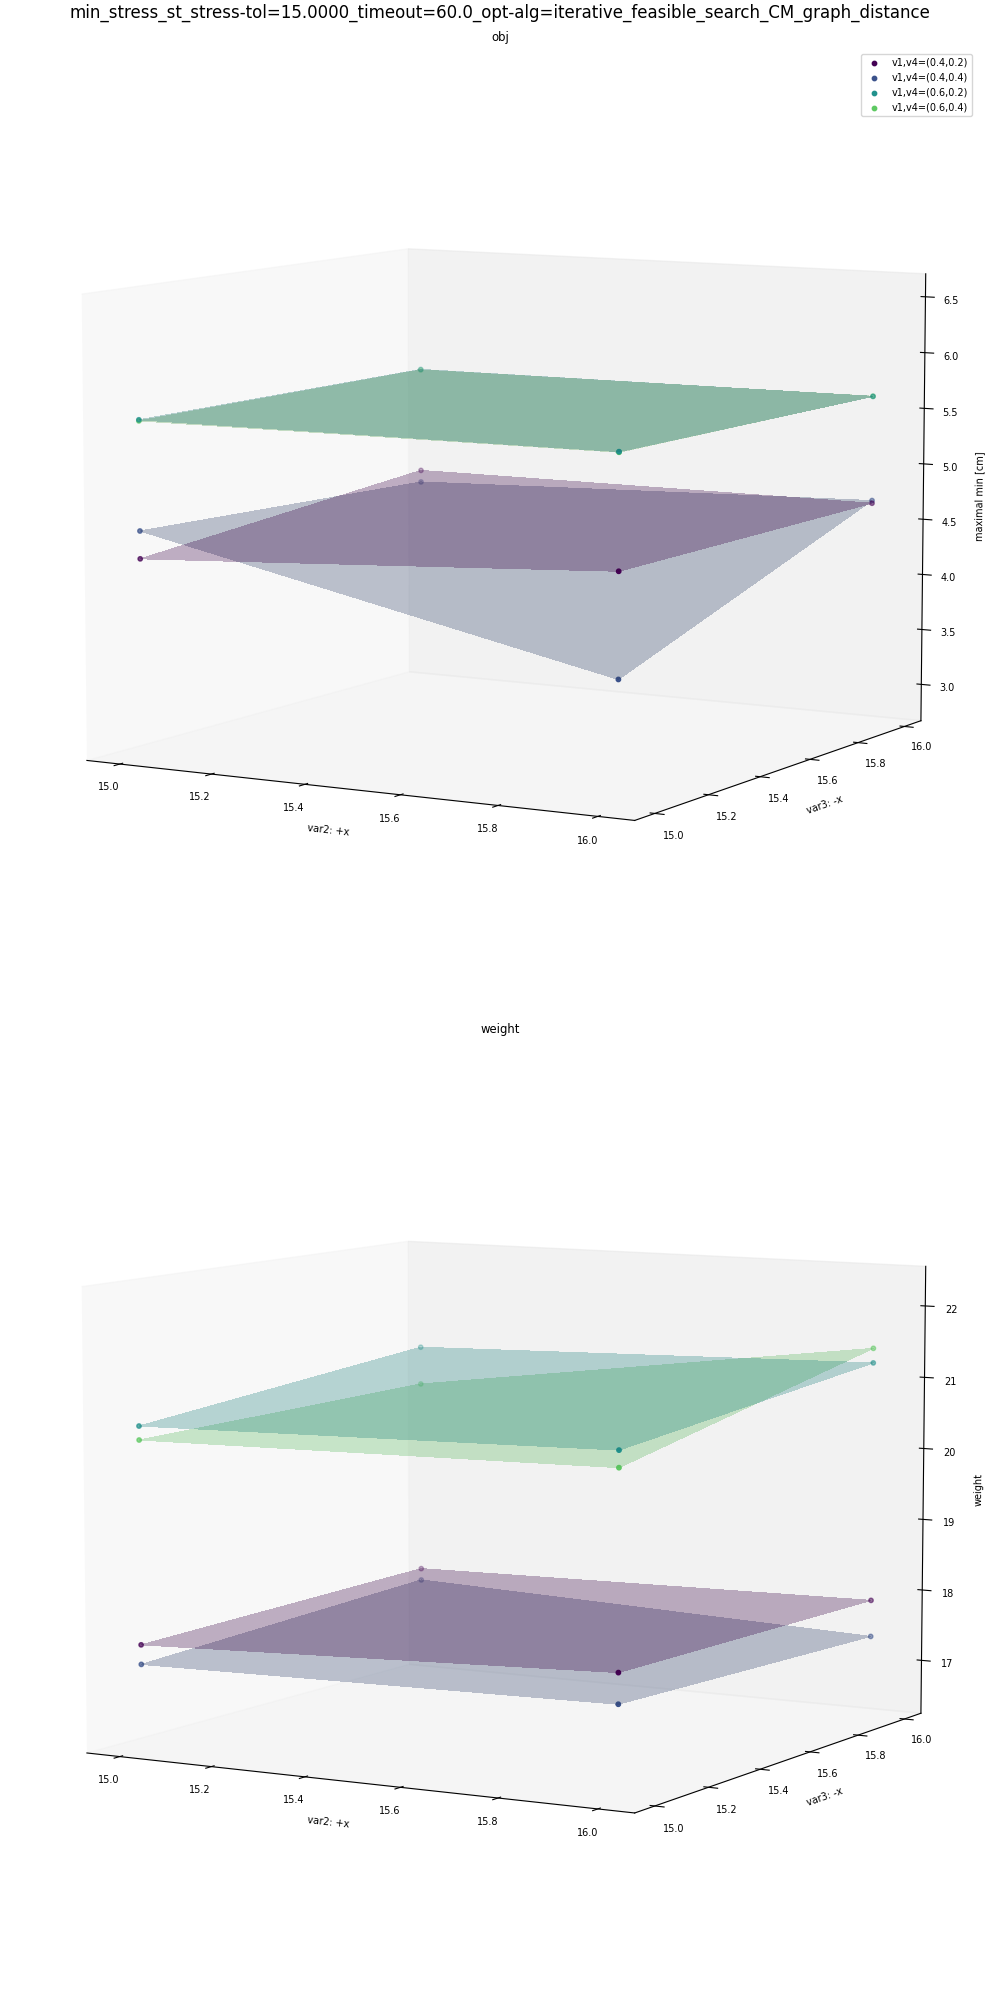

In [24]:
from itertools import combinations, product
from matplotlib import cm

azim = -60.046697751995794
elev = 7.679260758531882

save = 0
single_plot_size = 10
indexed = 0
plt.rc('font', size=7)

cmap = cm.get_cmap('viridis')
var1_vals = pd_data['var1'].unique()
var4_vals = pd_data['var4'].unique()

# TODO read from csv misc_info column
bridge_max_depth = 10.0
obj_names = pd_data.columns[num_vars:]

fig = plt.figure(figsize=(single_plot_size, single_plot_size*len(obj_names)), layout='constrained')

for k, obj_name in enumerate(obj_names):
    ax = fig.add_subplot(len(obj_names), 1, k+1, projection='3d')
    # ax = plt.axes(projection ='3d')
    ax.view_init(elev, azim)
    
    for i, (var1_val, var4_val) in enumerate(product(var1_vals.tolist(), var4_vals.tolist())):
        color = cmap(i/(len(var1_vals)*len(var4_vals)))
        plot_data = pd_data.query("var1 == @var1_val and var4 == @var4_val")
        mesh_grid = data_frame_to_mesh_grid(plot_data, 'var2', 'var3', obj_name)
        
        sp = ax.scatter(plot_data['var2'], plot_data['var3'], plot_data[obj_name], s=10, color=color,
                        label="v1,v4=({:.1f},{:.1f})".format(var1_val, var4_val/bridge_max_depth))
        ax.plot_surface(*mesh_grid, alpha=0.3, color=color, 
                        linewidth=0, antialiased=False)
    
    # if obj_name != 'obj':
    ax.set_zlim(*z_value_limits_from_obj_name[obj_name])
    
    ax.set_xlabel('var2: +x')
    ax.set_ylabel('var3: -x')
    if obj_name == 'obj':
        unit = '[kN/cm2]' if constraint_type == 'stress' else '[cm]'
        zlabel = 'maximal {} {}'.format(constraint_type, unit)
    else:
        zlabel = obj_name
    ax.set_zlabel(zlabel)

    ax.title.set_text(obj_name)
    ax.grid(False)
    
    if k == 0:
        ax.legend()

    # fig.suptitle(test_name + '\n' + "var1={:.2f} (branch pt param)\nvar4={:.2f}(% of total depth)".format(var1_val, var4_val/bridge_max_depth*100), fontsize=12)
    fig.suptitle(test_name, fontsize=12)
    if save:
        fig.savefig(os.path.join(image_save_path, 'multi_obj_landscape.png'), dpi=200)

## Plot by variable 1

In [24]:
pd_data.columns[num_vars:]

Index(['obj', 'weight', 'num_sols'], dtype='object')

- v1 = branching point crv parm
- v2 = +x dist
- v3 = -x dist
- v4 = fork pt raise

In [36]:
plt.clf()

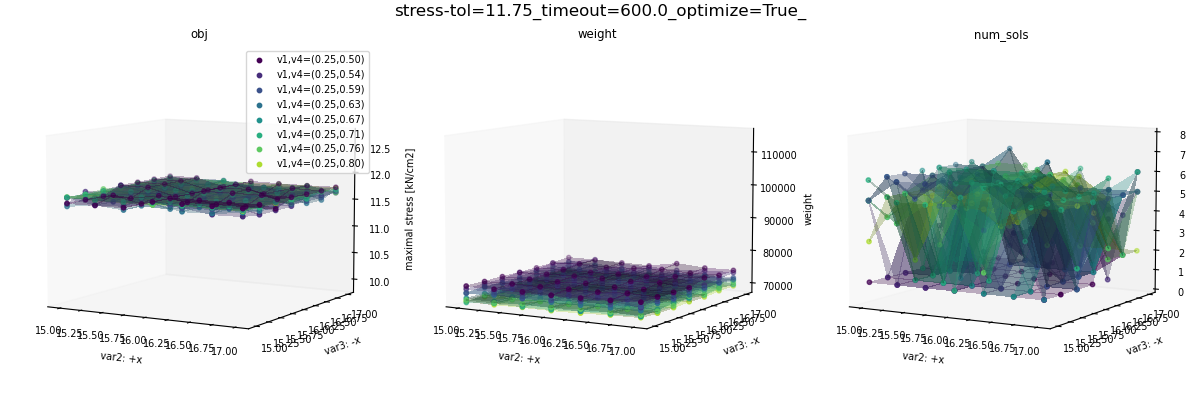

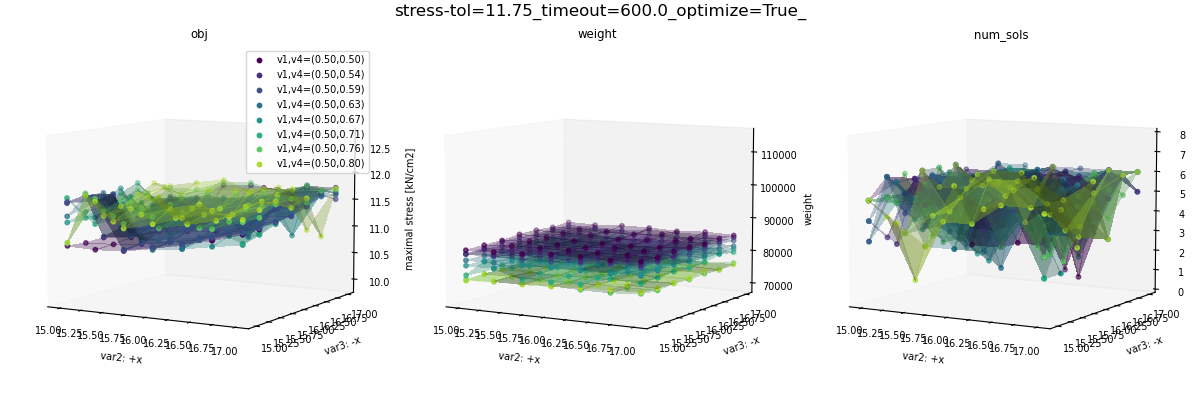

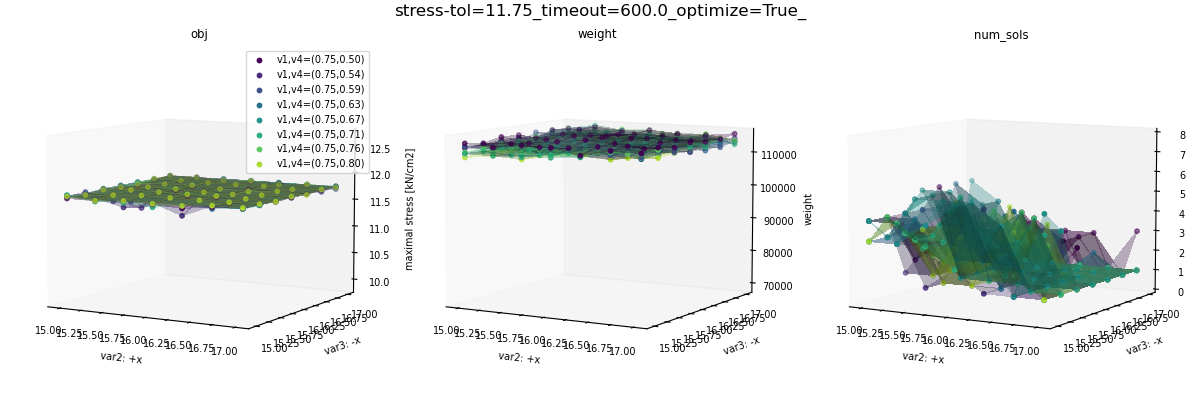

In [47]:
from matplotlib import cm

azim = -60.046697751995794
elev = 7.679260758531882

save = 1
single_plot_size = 4
indexed = 0
plt.rc('font', size=7)

cmap = cm.get_cmap('viridis')
var1_vals = pd_data['var1'].unique()
var4_vals = pd_data['var4'].unique()

# TODO read from csv misc_info column
bridge_max_depth = 10.0
obj_names = pd_data.columns[num_vars:]

plot_layout = [1, len(obj_names)]

for i, var1_val in enumerate(var1_vals.tolist()):
    fig = plt.figure(figsize=(single_plot_size*plot_layout[1], single_plot_size*plot_layout[0]), layout='constrained')
    for k, obj_name in enumerate(obj_names):
        ax = fig.add_subplot(*plot_layout, k+1, projection='3d')
        ax.view_init(elev, azim)
        
        for j, var4_val in enumerate(var4_vals.tolist()):
            color = cmap(j/(len(var4_vals)))
            plot_data = pd_data.query("var1 == @var1_val and var4 == @var4_val")
            mesh_grid = data_frame_to_mesh_grid(plot_data, 'var2', 'var3', obj_name)
            
            sp = ax.scatter(plot_data['var2'], plot_data['var3'], plot_data[obj_name], s=10, color=color,
                            label="v1,v4=({:.2f},{:.2f})".format(var1_val, var4_val/bridge_max_depth))
            ax.plot_surface(*mesh_grid, alpha=0.3, color=color, 
                            linewidth=0, antialiased=False)
        
        # if obj_name != 'obj':
        ax.set_zlim(*z_value_limits_from_obj_name[obj_name])
        
        ax.set_xlabel('var2: +x')
        ax.set_ylabel('var3: -x')
        if obj_name == 'obj':
            unit = '[kN/cm2]' if constraint_type == 'stress' else '[cm]'
            zlabel = 'maximal {} {}'.format(constraint_type, unit)
        else:
            zlabel = obj_name
        ax.set_zlabel(zlabel)
    
        ax.title.set_text(obj_name)
        ax.grid(False)
        
        if k == 0:
            ax.legend()
    
    # fig.suptitle(test_name + '\n' + "var1={:.2f} (branch pt param)\nvar4={:.2f}(% of total depth)".format(var1_val, var4_val/bridge_max_depth*100), fontsize=12)
    fig.suptitle(test_name, fontsize=12)
    if save:
        fig.savefig(os.path.join(image_save_path, 'multi_obj_landscape_var1={:.2f}.png'.format(var1_val)), dpi=200)
        # fig.savefig(os.path.join(image_save_path, 'multi_obj_landscape_var1={:.2f}.pdf'.format(var1_val)), dpi=200)

## individual plots

In [74]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'C:\\Users\\harry\\miniconda3\\envs\\seq_dse\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

In [75]:
pd_data.columns[num_vars:]

Index(['obj', 'weight', 'num_sols'], dtype='object')

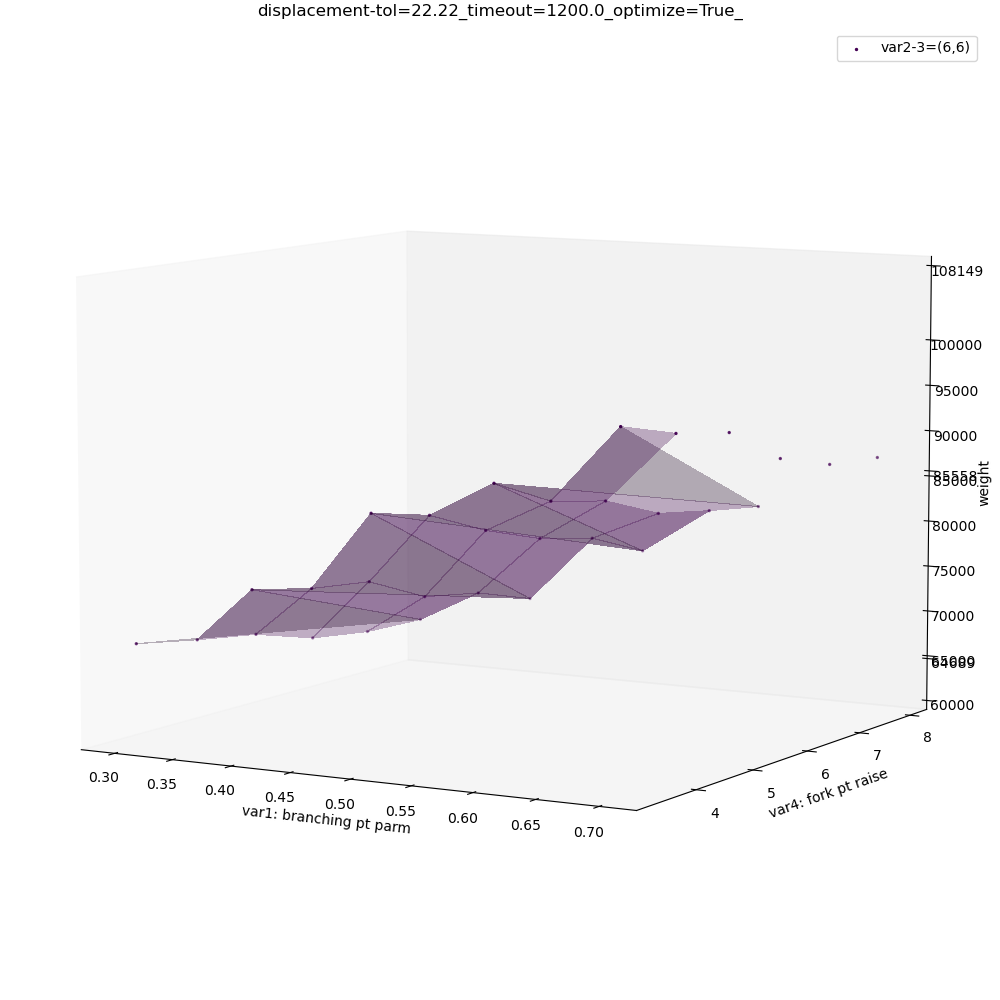

In [85]:
from matplotlib import cm

azim = -60.046697751995794
elev = 7.679260758531882

# plt.clf()
plt.rc('font', size=10)
scale = 1.0
indexed = 0
write = 0

cmap = cm.get_cmap('viridis')
nx, ny = len(np.unique(pd_data['var1'])), len(np.unique(pd_data['var4']))

full_obj_names = pd_data.columns[num_vars:]
obj_names = ['weight']

for k, obj_name in enumerate(obj_names): 
    fig = plt.figure(figsize=(10, 10), layout='constrained')
    # ax = fig.add_subplot(1, len(obj_names), k+1, projection='3d')
    ax = plt.axes(projection ='3d')
    # if obj_name == 'weight':
    #     w_elev = 8.217813772192017 
    #     w_azim = -80.55305518309888
    #     ax.view_init(w_elev, w_azim)
    # else:
    ax.view_init(elev, azim)
    
    if indexed:
        for index, row in pd_data.iterrows():
            ax.text(row['var1'], row['var4'], row[obj_name]*scale, index, fontsize=5)
        
    # for i in range(len(var23_values)):
    for i in [0]:
        color = cmap(i/len(var23_values))
        obj_id = full_obj_names.get_loc(obj_name)
        sp = ax.scatter(np_data_from_var3[i][:,0], np_data_from_var3[i][:,3], np_data_from_var3[i][:,obj_id+num_vars], color=color, s=2, 
                        label="var2-3=({:.0f},{:.0f})".format(var23_values[i][0], var23_values[i][1]))
        mesh_grid = column_data_to_mesh_grid(np_data_from_var3[i][:,[0,3]], np_data_from_var3[i][:,obj_id+num_vars], nx, ny)
        ax.plot_surface(*mesh_grid, color=color, alpha=0.3,
                        linewidth=0, antialiased=False)
        
    if obj_name == 'obj':
        ax.set_zlim(bottom=obj_lower_lim, top=obj_upper_lim)
        
    z_min = np.min(pd_data[obj_name]) * scale
    z_max = np.max(pd_data[obj_name]) * scale
    z_mean = np.mean(pd_data[obj_name]) * scale
    extraticks = [z_min, z_mean, z_max]
    ax.set_zticks(list(ax.get_zticks()) + extraticks)

    # plt.colorbar(sp, ax=ax)
    ax.set_xlabel('var1: branching pt parm')
    ax.set_ylabel('var4: fork pt raise')
    
    if obj_name == 'obj':
        unit = '[kN/cm2]' if constraint_type == 'stress' else '[cm]'
        zlabel = 'maximal {} {}'.format(constraint_type, unit)
    else:
        zlabel = obj_name
    ax.set_zlabel(zlabel)
    
    # ax.title.set_text(obj_name)
    ax.grid(False)
    ax.legend()
    
    fig.suptitle(test_name, fontsize=12)
    index_prefix = '' if indexed else 'un'
    
    if write:
        fig.savefig(os.path.join(image_save_path, '{}_landscape_{}indexed.png'.format(obj_name, index_prefix)), dpi=200)
        if not indexed:
            fig.savefig(os.path.join(image_save_path, '{}_landscape_{}indexed.pdf'.format(obj_name, index_prefix)), dpi=200)

In [81]:
print('azim = {}'.format(ax.azim))
print('elev = {}'.format(ax.elev))

azim = -80.55305518309888
elev = 8.217813772192017


## Parellel Coordinates

In [27]:
sub_data = pd_data[pd_data['obj']>9]
len(sub_data) / len(pd_data)

0.0

In [28]:
# print('max: {}, min: {}'.format(pd_data['var2'].max, pd_data['var2'].min))
pd_data.describe()

,var1,var2,var3,var4,obj,weight
count,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.50000,15.500000,15.500000,3.125000,5.058373,19.246728
std,0.10328,0.516398,0.516398,0.645497,0.615123,1.669701
min,0.40000,15.000000,15.000000,2.500000,3.749021,17.371773
25%,0.40000,15.000000,15.000000,2.500000,4.647844,17.673528
50%,0.50000,15.500000,15.500000,3.125000,5.144375,19.198852
75%,0.60000,16.000000,16.000000,3.750000,5.614948,20.692662
max,0.60000,16.000000,16.000000,3.750000,5.624744,21.426983


In [30]:
import plotly.express as px

fig = px.parallel_coordinates(pd_data, color="obj", labels={"obj": "max stress",
                "var1": "branching location", "var2": "leg +x",
                "var3": "leg -x", "var4": "fork raise",},
                             color_continuous_scale=px.colors.diverging.Tealrose,)
                             # color_continuous_midpoint=2)
fig.show()

# Sequence plot tests

In [17]:
design_id = 0
seq_dp  = orig_pd_data["seq_data_path"][design_id]

with open(os.path.join(image_data_path, seq_dp), 'r') as fp:
    seq_data = json.load(fp) 

In [18]:
seq_id = -1
seq = sorted(seq_data['solutions'], key=lambda x:x['seq_cost'])[seq_id]['seq']

In [19]:
constraint_type = test_name.split('_')[0].split('=')[0].split('-')[0]
tol = float(test_name.split('_')[0].split('=')[-1])
unit = '[kN/cm2]' if constraint_type == 'stress' else '[cm]'

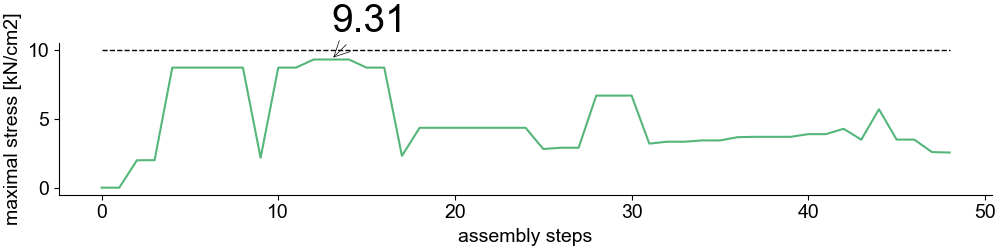

In [26]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 2.5), layout='constrained')

fea_history = [step[1] for step in seq]
max_fea = np.max(fea_history)
max_id = np.argmax(fea_history)

# perf_color = '#4A3981' 
perf_color = '#55B679'
ax.plot(range(len(seq)), fea_history, c=perf_color)
ax.plot(range(len(seq)), [tol for step in seq], c='black', linestyle='--', linewidth = 1)
# ax.plot(range(len(seq)), [max_fea for step in seq], c='black', linestyle='-', linewidth = 0.5)

ax.set_xlabel('assembly steps')
ax.set_ylabel('maximal {} {}'.format(constraint_type, unit))

ax.annotate('{:.2f}'.format(max_fea), xy=(max_id, max_fea), xytext=(max_id, max_fea+2), xycoords='data',
             arrowprops=dict(arrowstyle="->", lw=0.5), fontsize=28,
             )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# extraticks = [max_fea]
# plt.yticks(list(plt.yticks()[0]) + extraticks);

# fig.savefig(os.path.join(image_data_path, '{}-seq{}.pdf'.format(os.path.basename(seq_dp).split('.json')[0], seq_id)), dpi=200)

In [108]:
a = np.array([12.3,7., 5.2,12.1, 5.22, 5.2111, 5.2111, 10.00])
ids = np.argsort(a)
print(ids)
a[ids]

[2 5 6 4 1 7 3 0]


array([ 5.2   ,  5.2111,  5.2111,  5.22  ,  7.    , 10.    , 12.1   ,
       12.3   ])